<a href="https://colab.research.google.com/github/mkosaka1/Speech_Emotion_Recognition/blob/master/3.%20Transfer_Learning%20-%20Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [43]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import os
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers




# Labels

In [6]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'angry': 
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(224,224)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            # image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=200) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}
    
    return labels[class_code]


In [7]:
Images, Labels = get_images('/content/drive/My Drive/sorted_data/') #Extract the training images from the folders.

# Images = np.array(Images) #converting the list of images to numpy array.
# Labels = np.array(Labels)

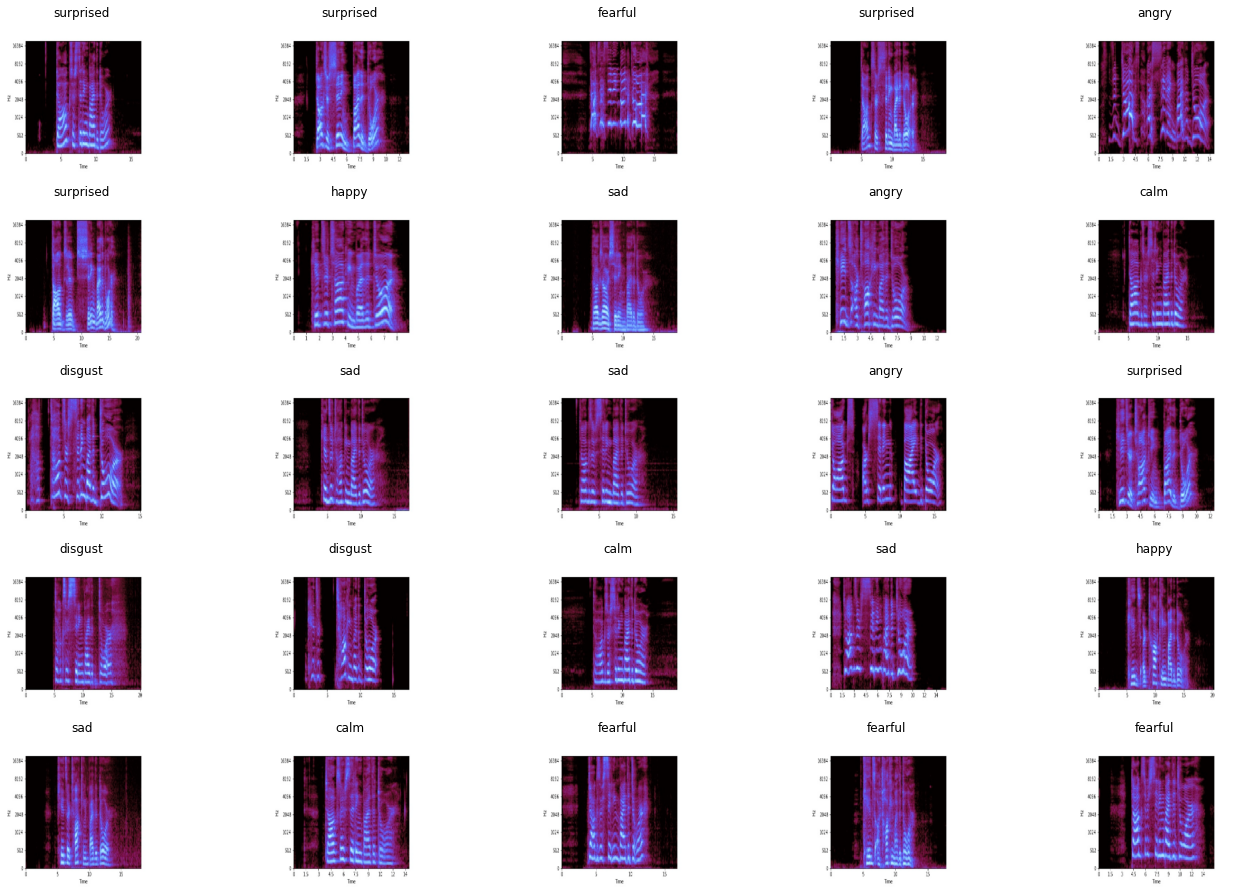

In [10]:
from random import randint

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [11]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.3,random_state=22,stratify=y_model)


In [12]:
# Images = np.array(Images) #converting the list of images to numpy array.
# Labels = np.array(Labels)

In [13]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

X_train=np.array(X_train)/255
# y_train = to_categorical(lb.fit_transform(y_train),num_classes=8)

X_test=np.array(X_test)/255
# y_test = to_categorical(lb.fit_transform(y_test),num_classes=8)

X_val=np.array(X_val)/255
# y_val = to_categorical(lb.fit_transform(y_val),num_classes=8)



y_val=np_utils.to_categorical(lb.fit_transform(y_val))
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [14]:
X_test.shape

(432, 224, 224, 3)

In [15]:
X_train.shape

(705, 224, 224, 3)

In [16]:
y_test.shape

(432, 8)

In [17]:
X_train[90][50]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# VGG16

Text(0.5, 1.0, 'Number of training images per category:')

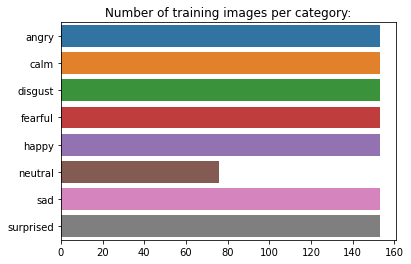

In [3]:
train_data_dir = "/content/drive/My Drive/logmel/train"
val_data_dir = "/content/drive/My Drive/logmel/validation"
test_data_dir = "/content/drive/My Drive/logmel/test"
category_names = sorted(os.listdir('/content/drive/My Drive/logmel/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/My Drive/logmel/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [20]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
input_shape = (224,224,3)
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', pooling='avg', include_top=False, input_shape = input_shape)

58892288/58889256 [==============================] - 1s 0us/step


In [21]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f82bd4f6128> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82bcff3b38> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82bcff3e10> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f82bd4f6080> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82bd02aef0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82b0305da0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f82b030c780> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82b030c9e8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82b0315860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82b0315940> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f82b031d860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f82b0326

In [22]:
for layer in conv_base.layers[:-7]:
    layer.trainable = False

In [32]:
for layer in conv_base.layers[:-13]:
    layer.trainable = False

In [23]:

model = models.Sequential()
model.add(conv_base)
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.15))

model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))


model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [21]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 1

# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
val_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 1147 images belonging to 8 classes.
Total number of images for "validation":
Found 150 images belonging to 8 classes.
Total number of images for "testing":
Found 143 images belonging to 8 classes.


In [34]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
batch_size=1
epochs = 20
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [36]:
history = model.fit(X_train, y_train,
                              epochs=epochs,
                              shuffle=True, 
                              validation_data=(X_val,y_val),
                              callbacks=[checkpoint]
                              )

Epoch 1/20
23/23 [==============================] - ETA: 0s - loss: 3.8193 - acc: 0.1404
Epoch 00001: val_acc improved from -inf to 0.13531, saving model to sign_classifier.h5
23/23 [==============================] - 4s 164ms/step - loss: 3.8193 - acc: 0.1404 - val_loss: 3.7350 - val_acc: 0.1353
Epoch 2/20
22/23 [===========================>..] - ETA: 0s - loss: 3.7534 - acc: 0.1321
Epoch 00002: val_acc improved from 0.13531 to 0.19472, saving model to sign_classifier.h5
23/23 [==============================] - 3s 121ms/step - loss: 3.7530 - acc: 0.1319 - val_loss: 3.6840 - val_acc: 0.1947
Epoch 3/20
22/23 [===========================>..] - ETA: 0s - loss: 3.6948 - acc: 0.1392
Epoch 00003: val_acc did not improve from 0.19472
23/23 [==============================] - 2s 106ms/step - loss: 3.6947 - acc: 0.1390 - val_loss: 3.6418 - val_acc: 0.1320
Epoch 4/20
22/23 [===========================>..] - ETA: 0s - loss: 3.6215 - acc: 0.1307
Epoch 00004: val_acc did not improve from 0.19472
23/2

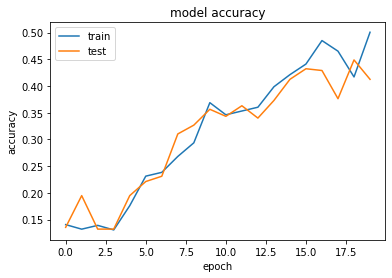

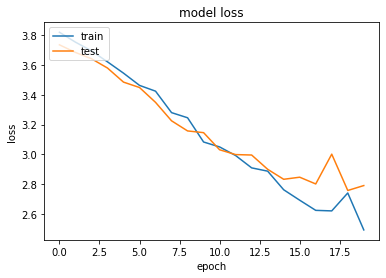

In [37]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [55]:
model = models.load_model("sign_classifier.h5")


In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

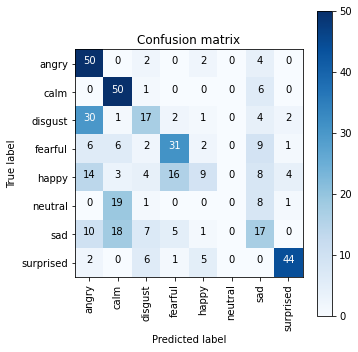

In [45]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [38]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

NameError: ignored

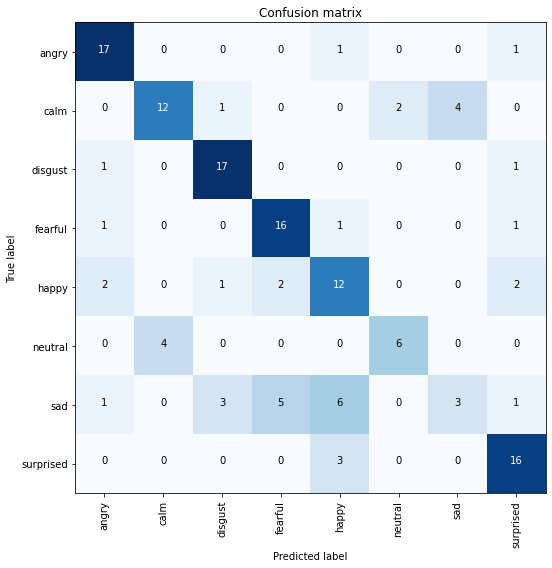

In [57]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [58]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 69.2% 


In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.45      0.86      0.59        58
        calm       0.52      0.88      0.65        57
     disgust       0.42      0.30      0.35        57
     fearful       0.56      0.54      0.55        57
       happy       0.45      0.16      0.23        58
     neutral       0.00      0.00      0.00        29
         sad       0.30      0.29      0.30        58
   surprised       0.85      0.76      0.80        58

    accuracy                           0.50       432
   macro avg       0.44      0.47      0.43       432
weighted avg       0.47      0.50      0.46       432



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# VGG 16 Image Augmentation

In [49]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

# test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
# test_generator.fit(x_test)

In [51]:
from keras.callbacks import ReduceLROnPlateau

lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)


In [102]:
model= Sequential()
model.add(conv_base) 
model.add(Flatten()) 

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
Total params: 14,714,688
Trainable params: 9,439,232
Non-trainable params: 5,275,456
_________________________________________________________________


In [104]:
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=512))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                

In [111]:
from tensorflow.keras import layers, models, Model, optimizers

#Initializing the hyperparameters
learning_rate = 5e-2
epochs = 10
# checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit_generator(train_generator.flow(X_train, y_train, batch_size= batch_size),
                              epochs = epochs, 
                              # steps_per_epoch = X_train.shape[0]//batch_size, 
                              validation_data = val_generator.flow(X_val, y_val, batch_size = batch_size), 
                              callbacks=[lrr], 
                              verbose = 1,
                              shuffle=True
                              )



Epoch 1/10
705/705 [==============================] - 15s 21ms/step - loss: 30.6095 - acc: 0.1191 - val_loss: 22.8757 - val_acc: 0.1353
Epoch 2/10
361/705 [==============>...............] - ETA: 5s - loss: 22.6600 - acc: 0.1191

KeyboardInterrupt: ignored

In [96]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plt(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plt(model.history.history['val_loss'],color='r',label='Validation Loss')

#Accuracy
ax[1].plt(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plt(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

AttributeError: ignored

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3 ))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=5e-5),
              metrics=['acc'])
              
# history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
#                               validation_data=val_generator, validation_steps=50, 
#                               verbose=1) 
history = model.fit_generator(train_generator, 
                              epochs=30,
                              steps_per_epoch=len(train_generator)//batch_size,
                              shuffle=True, 
                              validation_data=val_generator) 

Total number of images for "training":
Found 1147 images belonging to 8 classes.
Total number of images for "validation":
Found 150 images belonging to 8 classes.
Total number of images for "testing":
Found 143 images belonging to 8 classes.
Epoch 1/30
1147/1147 [==============================] - 25s 22ms/step - loss: 3.9488 - acc: 0.8003 - val_loss: 4.3172 - val_acc: 0.7467
Epoch 2/30
1147/1147 [==============================] - 25s 22ms/step - loss: 3.4021 - acc: 0.8884 - val_loss: 4.9368 - val_acc: 0.7400
Epoch 3/30
1147/1147 [==============================] - 26s 22ms/step - loss: 3.2313 - acc: 0.8823 - val_loss: 3.9361 - val_acc: 0.7400
Epoch 4/30
1147/1147 [==============================] - 25s 22ms/step - loss: 3.0009 - acc: 0.9085 - val_loss: 3.8543 - val_acc: 0.7200
Epoch 5/30
1147/1147 [==============================] - 25s 22ms/step - loss: 2.8652 - acc: 0.8901 - val_loss: 3.6766 - val_acc: 0.7400
Epoch 6/30
1147/1147 [==============================] - 26s 23ms/step - loss: 

In [37]:
batch_size = 1

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=20,
#         zoom_range=0.2,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         horizontal_flip=False,
#         brightness_range = (0.9,1.1),
#         fill_mode='nearest'
#         )

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range = (0.9,1.1)
        )

test_datagen =  ImageDataGenerator(
    rescale=1./255
)
val_datagen =  ImageDataGenerator(
    rescale=1./255
)
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data

train_aug = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
save_to_dir='/content/drive/My Drive/augm_images', 
save_prefix='aug', 
save_format='jpg',
class_mode = "categorical")

Found 1147 images belonging to 8 classes.


In [50]:
model = models.Sequential()
model.add(conv_base)
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.15))

model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_28 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 8200      
Total params: 15,248,200
Trainable params: 9,972,744
Non-trainable params: 5,275,456
_________________________________________________________________


In [51]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate = 5e-5
epochs = 30
checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])
history = model.fit_generator(train_aug, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              steps_per_epoch=len(train_aug)//batch_size,
                              callbacks=[checkpoint]
                              )

Epoch 1/30
1147/1147 [==============================] - ETA: 0s - loss: 0.8964 - acc: 0.8474
Epoch 00001: val_acc improved from -inf to 0.68667, saving model to sign_classifier_augm.h5
1147/1147 [==============================] - 48s 42ms/step - loss: 0.8964 - acc: 0.8474 - val_loss: 1.9749 - val_acc: 0.6867
Epoch 2/30
1147/1147 [==============================] - ETA: 0s - loss: 0.5171 - acc: 0.9294
Epoch 00002: val_acc improved from 0.68667 to 0.72000, saving model to sign_classifier_augm.h5
1147/1147 [==============================] - 47s 41ms/step - loss: 0.5171 - acc: 0.9294 - val_loss: 1.9504 - val_acc: 0.7200
Epoch 3/30
1147/1147 [==============================] - ETA: 0s - loss: 0.4534 - acc: 0.9425
Epoch 00003: val_acc did not improve from 0.72000
1147/1147 [==============================] - 47s 41ms/step - loss: 0.4534 - acc: 0.9425 - val_loss: 1.9859 - val_acc: 0.6733
Epoch 4/30
1146/1147 [============================>.] - ETA: 0s - loss: 0.4236 - acc: 0.9459
Epoch 00004: val

KeyboardInterrupt: ignored

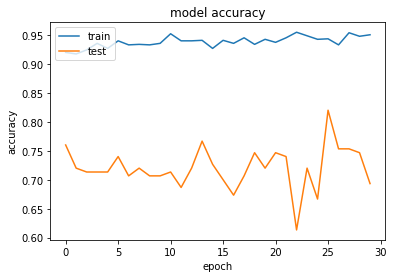

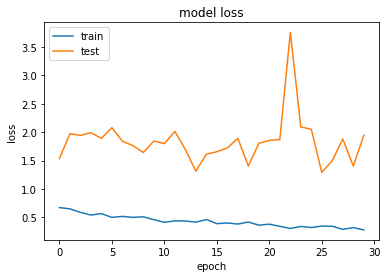

In [49]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [65]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

Confusion matrix, without normalization


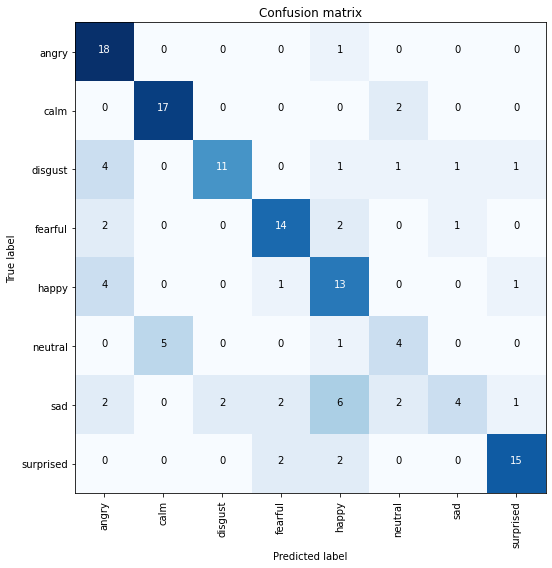

In [66]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [67]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 67.1% 


# Inception

In [ ]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D


imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False,pooling='avg', input_shape=(224,224,3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f56dcac1e10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f568c7966d8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f569604c860> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f568c7a88d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f568bad5128> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f568bad5f60> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f568badd400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f568baddba8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f568bae6a20> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f568bae6b00> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f568baf0a20> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f

In [ ]:
for layer in imagenet.layers[:10]:
    layer.trainable=False

In [ ]:
model = models.Sequential()
model.add(imagenet)
model.add(layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(nb_categories, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 8200      
Total params: 23,909,160
Trainable params: 23,840,888
Non-trainable params: 68,272
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 20
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              )

Epoch 1/20
1147/1147 [==============================] - 70s 61ms/step - loss: 3.0811 - acc: 0.1316 - val_loss: 2.8680 - val_acc: 0.1733
Epoch 2/20
1147/1147 [==============================] - 69s 60ms/step - loss: 2.7039 - acc: 0.2153 - val_loss: 2.6117 - val_acc: 0.1467
Epoch 3/20
1147/1147 [==============================] - 69s 60ms/step - loss: 2.2938 - acc: 0.3670 - val_loss: 2.4069 - val_acc: 0.3133
Epoch 4/20
1147/1147 [==============================] - 67s 59ms/step - loss: 1.8504 - acc: 0.5231 - val_loss: 2.3345 - val_acc: 0.3733
Epoch 5/20
1147/1147 [==============================] - 69s 60ms/step - loss: 1.4104 - acc: 0.6399 - val_loss: 2.2424 - val_acc: 0.3600
Epoch 6/20
1147/1147 [==============================] - 69s 60ms/step - loss: 1.0384 - acc: 0.7637 - val_loss: 2.3000 - val_acc: 0.3933
Epoch 7/20
1147/1147 [==============================] - 69s 60ms/step - loss: 0.7937 - acc: 0.8213 - val_loss: 2.4018 - val_acc: 0.3533
Epoch 8/20
1147/1147 [==========================

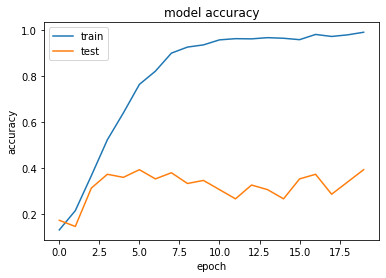

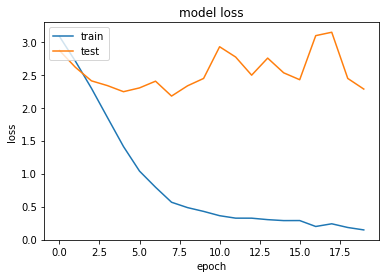

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

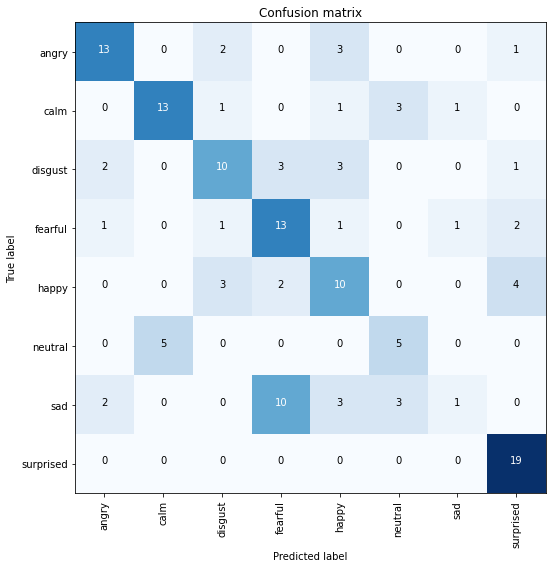

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

Confusion matrix, without normalization


#VGG19

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f944ca5e358> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944ca5e860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944d6d46a0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f94447c5b00> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944ca5e160> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944ca5e240> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f943bb149b0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c6c4860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f94447c50b8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943bd81d68> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943bd81f28> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f943bebe

In [ ]:
for layer in conv_base.layers[:-16]:
    layer.trainable = False

In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
# model = models.Sequential()
# model.add(conv_base)
# model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
# model.summary()

model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 4104      
Total params: 21,078,600
Trainable params: 20,818,440
Non-trainable params: 260,160
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 1

# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 1147 images belonging to 8 classes.
Total number of images for "validation":
Found 150 images belonging to 8 classes.
Total number of images for "testing":
Found 143 images belonging to 8 classes.


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 1e-5
epochs = 40
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs,
                              steps_per_epoch=len(train_generator)//batch_size,
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint],
                              )

Epoch 1/40
1147/1147 [==============================] - ETA: 0s - loss: 3.2493 - acc: 0.1665
Epoch 00001: val_acc improved from -inf to 0.39333, saving model to sign_classifier.h5
1147/1147 [==============================] - 45s 39ms/step - loss: 3.2493 - acc: 0.1665 - val_loss: 2.8644 - val_acc: 0.3933
Epoch 2/40
1147/1147 [==============================] - ETA: 0s - loss: 2.7000 - acc: 0.3714
Epoch 00002: val_acc did not improve from 0.39333
1147/1147 [==============================] - 43s 38ms/step - loss: 2.7000 - acc: 0.3714 - val_loss: 2.4191 - val_acc: 0.3933
Epoch 3/40
1147/1147 [==============================] - ETA: 0s - loss: 2.2967 - acc: 0.4874
Epoch 00003: val_acc improved from 0.39333 to 0.54000, saving model to sign_classifier.h5
1147/1147 [==============================] - 44s 38ms/step - loss: 2.2967 - acc: 0.4874 - val_loss: 2.1777 - val_acc: 0.5400
Epoch 4/40
1147/1147 [==============================] - ETA: 0s - loss: 2.0704 - acc: 0.5676
Epoch 00004: val_acc impro

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs,
                              steps_per_epoch=len(train_generator)//batch_size,
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint],
                              )

Epoch 1/40
1147/1147 [==============================] - ETA: 0s - loss: 2.5243 - acc: 0.1473
Epoch 00001: val_acc improved from -inf to 0.13333, saving model to sign_classifier.h5
1147/1147 [==============================] - 45s 39ms/step - loss: 2.5243 - acc: 0.1473 - val_loss: 2.3653 - val_acc: 0.1333
Epoch 2/40
1147/1147 [==============================] - ETA: 0s - loss: 2.3187 - acc: 0.1351
Epoch 00002: val_acc did not improve from 0.13333
1147/1147 [==============================] - 43s 38ms/step - loss: 2.3187 - acc: 0.1351 - val_loss: 2.2737 - val_acc: 0.1333
Epoch 3/40
1147/1147 [==============================] - ETA: 0s - loss: 2.2532 - acc: 0.1273
Epoch 00003: val_acc did not improve from 0.13333
1147/1147 [==============================] - 44s 38ms/step - loss: 2.2532 - acc: 0.1273 - val_loss: 2.2142 - val_acc: 0.1333
Epoch 4/40
1147/1147 [==============================] - ETA: 0s - loss: 2.2143 - acc: 0.1369
Epoch 00004: val_acc did not improve from 0.13333
1147/1147 [=====

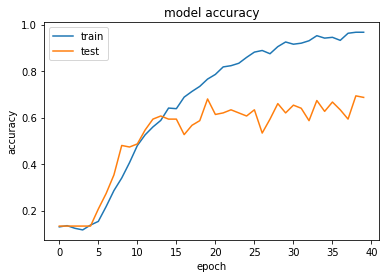

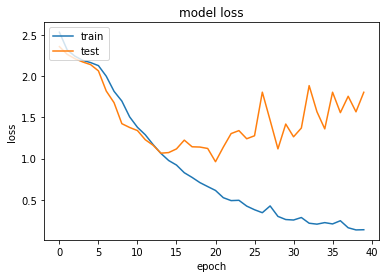

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()